# Data Mungin

## Step 1: Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, date

## Step 2: Reading the data

In [2]:
df_fighters = pd.read_csv('/Users/ksah4444/Documents/Capstone_UFC_ML/data/fighter_stats/2022-02-23T11-41-35.csv')
df_events =  pd.read_csv('/Users/ksah4444/Documents/Capstone_UFC_ML/data/fight_info/2022-02-26T17-12-31.csv')


## Step3: Take a glimpse look at the data

In [3]:
df_fighters.head(5)

,dob,fighter_id,height,n_draw,n_loss,n_win,name,reach,sig_str_abs_pM,sig_str_def_pct,sig_str_land_pM,sig_str_land_pct,stance,sub_avg,td_avg,td_def_pct,td_land_pct,weight
0,"Mar 02, 1992",2af2f2e26c4c0402,"5' 8""",0,2,9,Hunter Azure,"69""",2.08,0.58,3.92,0.53,Orthodox,1.3,1.97,0.67,0.34,145 lbs.
1,"Jun 26, 1982",0c277f3ff66b0208,"6' 2""",1,6,15,Virgil Zwicker,"74""",4.87,0.39,3.34,0.48,NaN,0.0,1.31,0.50,0.30,205 lbs.
2,"Jun 30, 1976",d29b5c4f22c6357d,"6' 2""",1,16,39,Gilbert Yvel,"77""",1.78,0.50,1.05,0.47,Orthodox,1.0,0.00,0.25,0.00,225 lbs.
3,"Feb 28, 1998",e415ea6f8d41c917,"5' 10""",0,3,8,Xie Bin,"72""",2.60,0.63,2.20,0.38,Orthodox,0.0,4.00,0.00,0.44,145 lbs.
4,"Apr 18, 1996",fdbefee0827e1567,"5' 8""",0,4,11,Wu Yanan,"66""",4.82,0.51,4.51,0.45,Orthodox,0.3,0.61,0.66,0.22,135 lbs.


In [4]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741 entries, 0 to 3740
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dob               3741 non-null   object 
 1   fighter_id        3741 non-null   object 
 2   height            3741 non-null   object 
 3   n_draw            3741 non-null   int64  
 4   n_loss            3741 non-null   int64  
 5   n_win             3741 non-null   int64  
 6   name              3741 non-null   object 
 7   reach             3741 non-null   object 
 8   sig_str_abs_pM    3741 non-null   float64
 9   sig_str_def_pct   3741 non-null   float64
 10  sig_str_land_pM   3741 non-null   float64
 11  sig_str_land_pct  3741 non-null   float64
 12  stance            2933 non-null   object 
 13  sub_avg           3741 non-null   float64
 14  td_avg            3741 non-null   float64
 15  td_def_pct        3741 non-null   float64
 16  td_land_pct       3741 non-null   float64


In [5]:
df_events.head(5)

,fight_id,fighter_1,fighter_1_id,fighter_2,fighter_2_id,winner,decision_method,fight_duration_lastrnd,fight_duration_lastrnd_time,time_format,weight_class,date,location
0,a1db4c917777aa79,Joe Charles,19ffeb5e3fffd6d5,Kevin Rosier,598a58db87b890ee,Joe Charles,Submission,1,0:14,No Time Limit,Open Weight Bout,"December 16, 1994","Tulsa, Oklahoma, USA"
1,b297c3e938e1005e,Joel Sutton,a6a9ab5a824e8f66,Jack McGlaughlin,237187ed9f419285,Joel Sutton,KO/TKO,1,2:01,1 Rnd (20),Open Weight Bout,"July 14, 1995","Casper, Wyoming, USA"
2,4b334c9727eee450,Joel Sutton,a6a9ab5a824e8f66,Geza Kalman,304fcd812f12c589,Joel Sutton,TKO - Doctor's Stoppage,1,0:48,1 Rnd (20),Open Weight Bout,"September 08, 1995","Buffalo, New York, USA"
3,6449a1a9a69a830c,Joe Charles,19ffeb5e3fffd6d5,Scott Bessac,3f24c96753dbd9f9,Joe Charles,Submission,1,4:38,1 Rnd (15),Open Weight Bout,"December 16, 1995","Denver, Colorado, USA"
4,5701dbbbfa4f8313,Sam Adkins,0e9869d712e81f8f,Keith Mielke,f62850b3c7480db9,Sam Adkins,KO/TKO,1,0:50,1 Rnd (10),Open Weight Bout,"February 16, 1996","San Juan, Puerto Rico"


In [6]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   fight_id                     21 non-null     object
 1   fighter_1                    21 non-null     object
 2   fighter_1_id                 21 non-null     object
 3   fighter_2                    21 non-null     object
 4   fighter_2_id                 21 non-null     object
 5   winner                       21 non-null     object
 6   decision_method              21 non-null     object
 7   fight_duration_lastrnd       21 non-null     int64 
 8   fight_duration_lastrnd_time  21 non-null     object
 9   time_format                  21 non-null     object
 10  weight_class                 21 non-null     object
 11  date                         21 non-null     object
 12  location                     21 non-null     object
dtypes: int64(1), object(12)
memory usage:

## Step 4: Clean df_fighters

| Column  | Description |                                                                                   
| ------------- | ------------- |                               
| 	dob  | Date of birth  |
| fighter_id  | Randmly generated ID number  |
| 	height  | height in ft'inch"  |
| weight  | weight class in lbs  |
| reach  |  length measuring from the tip of the middle finger on one hand to the other|
| n_draw  | Number of draws  |
| 	n_loss  | Number of losses  |
| n_win  | Number of wins  |
| 	name  | Name of the fighter  |
| sig_str_abs_pM  | Significant Strikes Landed per Minute  |
| 	sig_str_def_pct  | Significant Striking Accuracy  |
| sig_str_land_pM  | Significant Strikes Absorbed per Minute  |
| 	sig_str_land_pct  | Significant Strike Defence (the % of opponents strikes that did not land)  |
| sub_avg  | Average Submissions Attempted per 15 minutes  |
| td_avg  | Average Takedowns Landed per 15 minutes |
| td_def_pct  | Takedown Defense (the % of opponents TD attempts that did not land)  |
| td_land_pct  | Takedown Accuracy  |

In [7]:
# First let's check if there is any missing values in the name column
null_name = pd.isnull(df_fighters["name"])
df_fighters[null_name]

,dob,fighter_id,height,n_draw,n_loss,n_win,name,reach,sig_str_abs_pM,sig_str_def_pct,sig_str_land_pM,sig_str_land_pct,stance,sub_avg,td_avg,td_def_pct,td_land_pct,weight


In [8]:
# Let's check if there is any duplicates
df_fighters[df_fighters.duplicated(subset="name", keep=False)]

,dob,fighter_id,height,n_draw,n_loss,n_win,name,reach,sig_str_abs_pM,sig_str_def_pct,sig_str_land_pM,sig_str_land_pct,stance,sub_avg,td_avg,td_def_pct,td_land_pct,weight
553,"Jan 15, 1991",d0314416a7f26527,"5' 9""",0,4,17,Michael McDonald,"70""",2.76,0.57,2.69,0.42,Orthodox,1.4,1.09,0.52,0.66,135 lbs.
555,"Feb 06, 1965",d52ef694108f8235,"5' 11""",0,1,1,Michael McDonald,--,0.40,0.50,0.00,0.00,Orthodox,0.0,0.00,0.00,0.00,205 lbs.
1296,"Jul 13, 1989",12ebd7d157e91701,"6' 0""",0,6,22,Bruno Silva,"74""",2.87,0.32,5.74,0.60,Orthodox,0.0,0.00,0.68,0.00,185 lbs.
1297,"Mar 16, 1990",294aa73dbf37d281,"5' 4""",2,5,12,Bruno Silva,"65""",3.23,0.58,2.98,0.46,Orthodox,0.0,2.89,0.64,0.31,125 lbs.
2952,"Oct 07, 1992",fb3e61720be4690c,"6' 0""",0,2,9,Mike Davis,"72""",6.76,0.57,6.24,0.53,Orthodox,0.0,1.39,0.69,0.33,155 lbs.
2957,--,c8661e204c66f325,--,0,0,2,Mike Davis,--,0.00,0.00,0.00,0.00,NaN,0.0,0.00,0.00,0.00,--
3298,"Aug 29, 1989",3a28e1e641366308,"5' 10""",0,1,7,Joey Gomez,"71""",3.33,0.50,3.73,0.49,Orthodox,0.0,2.00,0.00,0.28,155 lbs.
3300,"Jul 21, 1986",0778f94eb5d588a5,"5' 10""",0,2,6,Joey Gomez,"73""",4.46,0.55,2.44,0.28,Orthodox,0.0,0.62,0.50,1.00,135 lbs.
3686,--,a45bab49951a45cd,"6' 1""",0,3,11,Tony Johnson,--,4.73,0.31,2.00,0.53,NaN,0.0,2.00,0.00,0.22,265 lbs.
3694,"May 02, 1983",3641a0d117e9bc6c,"6' 2""",0,2,7,Tony Johnson,"76""",3.67,0.22,4.00,0.92,Orthodox,0.0,0.00,0.90,0.00,205 lbs.


#### It seems we have 5 identical name fighters:**Michael McDonald**, **Bruno Silva**, **Mike Davis**, **Joey Gomez**, and **Tony Johnson**. 
- **Michael McDonald**: There is a 70lbs (30kg) difference in weight, so we can confidently say they are not the same person
- **Bruno Silva**: Again there is a 60lbs (25kg) difference in weight, not to mention the 8" height differnce
- **Mike Davis**: The second value has no info, so we can confidently drop this row
- **Joey Gomez**: This one is a bit tricky because they same height, and a sligh weight difference (20lbs). But apon further research it turns they are different people 
- **Tony Johnson**: Another trick one because of the very slight height differnce (1"), and closness in weight classes. But apon further research it turns they are different people.

http://www.espn.com/mma/fighters

### Result: We only drop the second **Mike Davis** row, because of it's lack of info
#### I didn't use other columns such as fighter_id because I didn't know how reliable they are


In [9]:
# Drop "Mike Davis" Second Value
df_fighters = df_fighters.drop(labels=2957, axis=0).reset_index()

In [10]:
# Now drop the fighter id as we have no need for it.
df_fighters.drop(['fighter_id'], axis = 1, inplace=True)

In [11]:
# Instead use "name" column as an index
df_fighters.set_index("name", inplace=True)

### Before this, I have been going through the data in a column by column process. Now, I want to skip the **record** and **dob** to get a look at the **striking stats**. Because without the **striking stats**, our model won't have enough features to go through.

In [12]:
# Now let's see how many fighters are missing both or either of the striking and grappling stats
df_st = df_fighters.loc[(df_fighters['sig_str_abs_pM'] == 0) & (df_fighters['sig_str_def_pct'] == 0) & (df_fighters['sig_str_land_pM'] == 0)
& (df_fighters['sig_str_land_pct'] == 0)]
df_gr = df_fighters.loc[(df_fighters['sub_avg'] == 0) & (df_fighters['td_avg'] == 0) & (df_fighters['td_def_pct'] == 0) & (df_fighters['td_land_pct'] == 0)]
df_st_gr = df_fighters.loc[(df_fighters['sub_avg'] == 0) & (df_fighters['td_avg'] == 0) & (df_fighters['td_def_pct'] == 0) & (df_fighters['td_land_pct'] == 0)
& (df_fighters['sig_str_abs_pM'] == 0) & (df_fighters['sig_str_def_pct'] == 0) & (df_fighters['sig_str_land_pM'] == 0)
& (df_fighters['sig_str_land_pct'] == 0)]
print(len(df_st)/len(df_fighters))
print(len(df_gr)/len(df_fighters))
print(len(df_st_gr)/len(df_fighters))


0.17219251336898395
0.2671122994652406
0.1716577540106952


### I'm really struggling to make sense of these numbers, but I need to move on (it seems very "venn diagramy")

### It seems around %20 percent of our fighters are missing both striking, and grappling stats. So we can drop them, to make sure our model runs throught good features

In [13]:
df_fighters_cl = df_fighters.loc[~((df_fighters['sig_str_abs_pM'] == 0) &
                               (df_fighters['sig_str_def_pct'] == 0) & 
                               (df_fighters['sig_str_land_pM'] == 0) &
                               (df_fighters['sig_str_land_pct'] == 0) &
                               (df_fighters['sub_avg'] == 0) &
                               (df_fighters['td_avg'] == 0) &
                               (df_fighters['td_def_pct'] == 0) &
                               (df_fighters['td_land_pct'] == 0))].copy()
print(len(df_fighters_cl)/len(df_fighters))
df_fighters_cl.head(1)

0.8283422459893048


,index,dob,height,n_draw,n_loss,n_win,reach,sig_str_abs_pM,sig_str_def_pct,sig_str_land_pM,sig_str_land_pct,stance,sub_avg,td_avg,td_def_pct,td_land_pct,weight
name,,,,,,,,,,,,,,,,,
Hunter Azure,0,"Mar 02, 1992","5' 8""",0,2,9,"69""",2.08,0.58,3.92,0.53,Orthodox,1.3,1.97,0.67,0.34,145 lbs.


### Now we can move on the **dob** column, to calculate the age of a fighter

In [14]:
# First, let's seperate the month, day, and year to calculate the age
df_fighters_cl[["Month", "Day", "Year"]] = df_fighters_cl["dob"].str.split(" ", expand=True)
df_fighters_cl

,index,dob,height,n_draw,n_loss,n_win,reach,sig_str_abs_pM,sig_str_def_pct,sig_str_land_pM,sig_str_land_pct,stance,sub_avg,td_avg,td_def_pct,td_land_pct,weight,Month,Day,Year
name,,,,,,,,,,,,,,,,,,,,
Hunter Azure,0,"Mar 02, 1992","5' 8""",0,2,9,"69""",2.08,0.58,3.92,0.53,Orthodox,1.3,1.97,0.67,0.34,145 lbs.,Mar,"02,",1992
Virgil Zwicker,1,"Jun 26, 1982","6' 2""",1,6,15,"74""",4.87,0.39,3.34,0.48,NaN,0.0,1.31,0.50,0.30,205 lbs.,Jun,"26,",1982
Gilbert Yvel,2,"Jun 30, 1976","6' 2""",1,16,39,"77""",1.78,0.50,1.05,0.47,Orthodox,1.0,0.00,0.25,0.00,225 lbs.,Jun,"30,",1976
Xie Bin,3,"Feb 28, 1998","5' 10""",0,3,8,"72""",2.60,0.63,2.20,0.38,Orthodox,0.0,4.00,0.00,0.44,145 lbs.,Feb,"28,",1998
Wu Yanan,4,"Apr 18, 1996","5' 8""",0,4,11,"66""",4.82,0.51,4.51,0.45,Orthodox,0.3,0.61,0.66,0.22,135 lbs.,Apr,"18,",1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mike Jackson,3734,"Mar 22, 1985","6' 2""",0,1,0,--,1.33,0.75,4.25,0.58,Orthodox,0.0,0.95,0.88,1.00,170 lbs.,Mar,"22,",1985
Damon Jackson,3736,"Aug 08, 1988","5' 11""",1,4,19,"71""",3.25,0.48,2.54,0.38,Switch,2.5,2.48,0.35,0.33,145 lbs.,Aug,"08,",1988
Jeremy Jackson,3737,"Sep 19, 1982","5' 10""",0,5,9,--,2.03,0.25,0.71,0.27,Orthodox,0.0,1.52,0.58,0.40,170 lbs.,Sep,"19,",1982


In [15]:
df_fighters_cl["Day"] = df_fighters_cl["Day"].str.replace("[,]"," ")

/var/folders/kv/y12l8qrx5f17m46tv40vnnkw0000gn/T/ipykernel_996/3249117915.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_fighters_cl["Day"] = df_fighters_cl["Day"].str.replace("[,]"," ")


In [16]:
# Second, let's convert the month from a word to a number
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "Jan"] = 1
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "Feb"] = 2
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "Mar"] = 3
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "Apr"] = 4
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "May"] = 5
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "Jun"] = 6
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "Jul"] = 7
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "Aug"] = 8
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "Sep"] = 9
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "Oct"] = 10
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "Nov"] = 11
df_fighters_cl['Month'].loc[df_fighters_cl['Month'] == "Dec"] = 12
df_fighters_cl

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,index,dob,height,n_draw,n_loss,n_win,reach,sig_str_abs_pM,sig_str_def_pct,sig_str_land_pM,sig_str_land_pct,stance,sub_avg,td_avg,td_def_pct,td_land_pct,weight,Month,Day,Year
name,,,,,,,,,,,,,,,,,,,,
Hunter Azure,0,"Mar 02, 1992","5' 8""",0,2,9,"69""",2.08,0.58,3.92,0.53,Orthodox,1.3,1.97,0.67,0.34,145 lbs.,3,02,1992
Virgil Zwicker,1,"Jun 26, 1982","6' 2""",1,6,15,"74""",4.87,0.39,3.34,0.48,NaN,0.0,1.31,0.50,0.30,205 lbs.,6,26,1982
Gilbert Yvel,2,"Jun 30, 1976","6' 2""",1,16,39,"77""",1.78,0.50,1.05,0.47,Orthodox,1.0,0.00,0.25,0.00,225 lbs.,6,30,1976
Xie Bin,3,"Feb 28, 1998","5' 10""",0,3,8,"72""",2.60,0.63,2.20,0.38,Orthodox,0.0,4.00,0.00,0.44,145 lbs.,2,28,1998
Wu Yanan,4,"Apr 18, 1996","5' 8""",0,4,11,"66""",4.82,0.51,4.51,0.45,Orthodox,0.3,0.61,0.66,0.22,135 lbs.,4,18,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mike Jackson,3734,"Mar 22, 1985","6' 2""",0,1,0,--,1.33,0.75,4.25,0.58,Orthodox,0.0,0.95,0.88,1.00,170 lbs.,3,22,1985
Damon Jackson,3736,"Aug 08, 1988","5' 11""",1,4,19,"71""",3.25,0.48,2.54,0.38,Switch,2.5,2.48,0.35,0.33,145 lbs.,8,08,1988
Jeremy Jackson,3737,"Sep 19, 1982","5' 10""",0,5,9,--,2.03,0.25,0.71,0.27,Orthodox,0.0,1.52,0.58,0.40,170 lbs.,9,19,1982


In [308]:
# Third, let's check if there is any non integer/float values
df_fighters_cl[(df_fighters_cl['Month'] == "--") | (df_fighters_cl['Day'] == "None") | (df_fighters_cl['Year'] == "None")]

,index,dob,height,n_draw,n_loss,n_win,reach,sig_str_abs_pM,sig_str_def_pct,sig_str_land_pM,sig_str_land_pct,stance,sub_avg,td_avg,td_def_pct,td_land_pct,weight,Month,Day,Year
name,,,,,,,,,,,,,,,,,,,,
Jarrod Kwitty,17,--,"5' 8""",0,2,2,--,4.40,0.32,0.53,0.50,NaN,2.0,8.00,0.00,0.50,185 lbs.,--,None,None
Lina Kvokov,19,--,"5' 9""",0,3,0,--,12.12,0.19,2.31,0.30,Orthodox,0.0,0.00,0.00,0.00,135 lbs.,--,None,None
Kyle Kurtz,21,--,--,0,5,7,--,2.95,0.52,1.31,0.36,NaN,2.5,1.23,0.00,0.20,170 lbs.,--,None,None
Keigo Kunihara,28,--,"6' 0""",0,2,3,--,1.99,0.57,0.17,0.10,Orthodox,2.5,4.97,1.00,0.40,235 lbs.,--,None,None
Maiju Kujala,32,--,--,0,3,6,--,5.50,0.36,2.50,0.40,NaN,0.0,0.00,0.50,0.00,135 lbs.,--,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Carlton Jones,3674,--,"6' 1""",0,4,1,--,3.58,0.56,2.32,0.41,Orthodox,2.7,4.02,0.57,0.50,225 lbs.,--,None,None
Tony Johnson,3686,--,"6' 1""",0,3,11,--,4.73,0.31,2.00,0.53,NaN,0.0,2.00,0.00,0.22,265 lbs.,--,None,None
Deshaun Johnson,3690,--,--,0,9,6,--,6.67,0.43,2.27,0.41,NaN,0.0,0.00,0.00,0.00,167 lbs.,--,None,None


### It seems there is about 347 fighters with missing dob's. We can either fill them out manually from other sources such as ESPN MMA, sherdog, and tapalogy. Or just remove them for now to have enough time for the presentation tommarow
### For now we will just remove them

In [360]:
# Create a copy, to prevent error.
df_fighters_cl2 = df_fighters_cl.loc[~((df_fighters_cl['Month'] == "--") | (df_fighters_cl['Day'] == "None") | (df_fighters_cl['Year'] == "None"))].copy()


In [361]:
# Create another column for the DOB, with a specific format.
df_fighters_cl2["DOB"] = df_fighters_cl2["Year"].astype(str)+'/' + df_fighters_cl2["Month"].astype(str)+'/' + df_fighters_cl2["Day"].astype(str)

### I know this is probably the least efficient way to do it, but just as Dr. Rick said "it doesn't need to be pretty, it just needs to work"

In [362]:
# This function converts given date to age
def age(born):
	born = datetime.strptime(born, "%Y/%m/%d ").date()
	today = date.today()
	return today.year - born.year - ((today.month,
									today.day) < (born.month,
													born.day))

df_fighters_cl2['Age'] = df_fighters_cl2['DOB'].apply(age)

In [363]:
# Let's the drop the extra columns from the mess we created
df_fighters_cl2.drop(['dob','Month', 'Day', 'Year','DOB'], axis = 1, inplace=True)

In [364]:
# Finally, we want to see if there is any fighters missing thier height measurement
print(len(df_fighters_cl2.loc[df_fighters_cl2['height'] == '--']))
df_fighters_cl2.loc[df_fighters_cl2['height'] == '--']

11


,index,height,n_draw,n_loss,n_win,reach,sig_str_abs_pM,sig_str_def_pct,sig_str_land_pM,sig_str_land_pct,stance,sub_avg,td_avg,td_def_pct,td_land_pct,weight,Age
name,,,,,,,,,,,,,,,,,
Logan Nail,796,--,0,1,1,--,2.27,0.39,1.93,0.51,NaN,0.0,0.00,0.37,0.00,185 lbs.,32
Matt Ricehouse,1490,--,0,1,6,--,4.80,0.47,3.70,0.44,NaN,0.0,1.00,0.81,0.22,155 lbs.,34
Amador Ramirez,1601,--,0,4,5,--,2.07,0.69,4.93,0.51,NaN,0.0,1.00,0.00,0.33,135 lbs.,31
Bryan Travers,1700,--,0,4,15,--,3.93,0.55,2.33,0.48,NaN,0.0,2.00,0.63,0.28,155 lbs.,38
Maka Watson,1983,--,0,2,4,--,1.60,0.22,0.93,0.37,NaN,0.0,2.00,0.33,1.00,155 lbs.,37
Hiroshi Izumi,2290,--,0,2,4,--,2.65,0.66,1.95,0.37,Orthodox,0.5,3.35,1.00,0.70,205 lbs.,39
TJ Cook,2643,--,0,5,13,--,3.18,0.54,2.30,0.47,NaN,0.0,1.01,0.00,0.50,205 lbs.,39
Joe Duarte,2839,--,0,4,10,--,4.00,0.53,2.27,0.38,NaN,1.0,3.00,0.69,0.50,155 lbs.,45
Neal Ewing,2993,--,0,0,6,--,1.93,0.48,2.27,0.60,NaN,0.0,5.00,0.00,0.62,185 lbs.,36


### It seems we have 11 fighters that are missing thier heights, and since it is only a slight number. I think we can manually input it, fairly easy. 
### But first we need seperate the height, because it will make handling inputting a "qutation mark" much easier  

In [365]:
# Just like with the "DOB" column, I need to seperate the height
df_fighters_cl2[["feet", "inch"]] = df_fighters_cl2.height.str.split(" ", expand=True)

In [366]:
# Remove the ' from feet, and the " fro inch columns
df_fighters_cl2["feet"] = df_fighters_cl2["feet"].str.replace("'","", regex=True)
df_fighters_cl2["inch"] = df_fighters_cl2["inch"].str.replace('"',"", regex=True)

In [367]:
# Now we want to clean the "height" column
print(len(df_fighters_cl2.loc[df_fighters_cl2['height'] == '--']))
df_fighters_cl2.loc[df_fighters_cl2['height'] == '--']

11


,index,height,n_draw,n_loss,n_win,reach,sig_str_abs_pM,sig_str_def_pct,sig_str_land_pM,sig_str_land_pct,stance,sub_avg,td_avg,td_def_pct,td_land_pct,weight,Age,feet,inch
name,,,,,,,,,,,,,,,,,,,
Logan Nail,796,--,0,1,1,--,2.27,0.39,1.93,0.51,NaN,0.0,0.00,0.37,0.00,185 lbs.,32,--,None
Matt Ricehouse,1490,--,0,1,6,--,4.80,0.47,3.70,0.44,NaN,0.0,1.00,0.81,0.22,155 lbs.,34,--,None
Amador Ramirez,1601,--,0,4,5,--,2.07,0.69,4.93,0.51,NaN,0.0,1.00,0.00,0.33,135 lbs.,31,--,None
Bryan Travers,1700,--,0,4,15,--,3.93,0.55,2.33,0.48,NaN,0.0,2.00,0.63,0.28,155 lbs.,38,--,None
Maka Watson,1983,--,0,2,4,--,1.60,0.22,0.93,0.37,NaN,0.0,2.00,0.33,1.00,155 lbs.,37,--,None
Hiroshi Izumi,2290,--,0,2,4,--,2.65,0.66,1.95,0.37,Orthodox,0.5,3.35,1.00,0.70,205 lbs.,39,--,None
TJ Cook,2643,--,0,5,13,--,3.18,0.54,2.30,0.47,NaN,0.0,1.01,0.00,0.50,205 lbs.,39,--,None
Joe Duarte,2839,--,0,4,10,--,4.00,0.53,2.27,0.38,NaN,1.0,3.00,0.69,0.50,155 lbs.,45,--,None
Neal Ewing,2993,--,0,0,6,--,1.93,0.48,2.27,0.60,NaN,0.0,5.00,0.00,0.62,185 lbs.,36,--,None


In [368]:
# Input the heights manually from shredog, and tapalogy.
df_fighters_cl2.loc['Logan Nail', "feet"] = '6'
df_fighters_cl2.loc['Logan Nail', "inch"] = '3'
df_fighters_cl2.loc['Matt Ricehouse', "feet"] = '5'
df_fighters_cl2.loc['Matt Ricehouse', "inch"] = '10'
df_fighters_cl2.loc['Amador Ramirez', "feet"] = '5'
df_fighters_cl2.loc['Amador Ramirez', "inch"] = '7'
df_fighters_cl2.loc['Bryan Travers', "feet"] = '5'
df_fighters_cl2.loc['Bryan Travers', "inch"] = '10'
df_fighters_cl2.loc['Maka Watson', "feet"] = '5'
df_fighters_cl2.loc['Maka Watson', "inch"] = '9'
df_fighters_cl2.loc['Hiroshi Izumi', "feet"] = '5'
df_fighters_cl2.loc['Hiroshi Izumi', "inch"] = '8'
df_fighters_cl2.loc['TJ Cook', "feet"] = '5'
df_fighters_cl2.loc['TJ Cook', "inch"] = '10'
df_fighters_cl2.loc['Joe Duarte', "feet"] = '5'
df_fighters_cl2.loc['Joe Duarte', "inch"] = '9'
df_fighters_cl2.loc['Neal Ewing', "feet"] = '6'
df_fighters_cl2.loc['Neal Ewing', "inch"] = '0'
df_fighters_cl2.loc['Edward Faaloloto', "feet"] = '5'
df_fighters_cl2.loc['Edward Faaloloto', "inch"] = '9'
df_fighters_cl2.loc['Lee Higgins', "feet"] = '5'
df_fighters_cl2.loc['Lee Higgins', "inch"] = '10'

In [369]:
# Convert the column types to "integer", to be able to apply math equations
df_fighters_cl2["feet"]= df_fighters_cl2["feet"].astype(int)
df_fighters_cl2["inch"]= df_fighters_cl2["inch"].astype(int)

### Now, I would like to convert the height to metric units, because I think it's better to handle and it has no impact on the overall image

In [370]:
# Create a new column with the height in cm, and apply conversion 
df_fighters_cl2["height_cm"] = round(df_fighters_cl2["feet"]*30.48 + df_fighters_cl2["inch"]*2.54)

### We are getting closer to have "clean" data, after dealing with the height we deal with the reach

In [371]:
# Now we want to clean the "reach" column
print(len(df_fighters_cl2.loc[df_fighters_cl2['reach'] == '--']))
df_fighters_cl2.loc[df_fighters_cl2['reach'] == '--']

925


,index,height,n_draw,n_loss,n_win,reach,sig_str_abs_pM,sig_str_def_pct,sig_str_land_pM,sig_str_land_pct,stance,sub_avg,td_avg,td_def_pct,td_land_pct,weight,Age,feet,inch,height_cm
name,,,,,,,,,,,,,,,,,,,,
Igor Vovchanchyn,5,"5' 8""",0,10,55,--,0.97,0.63,1.59,0.49,Orthodox,0.5,1.19,0.50,0.66,205 lbs.,48,5,8,173.0
Austin Tweedy,8,"5' 9""",0,2,8,--,6.43,0.00,4.29,0.66,Orthodox,0.0,0.00,0.00,0.00,155 lbs.,31,5,9,175.0
Eldari Kurtanidze,22,"5' 6""",0,1,0,--,3.72,0.60,0.47,0.20,Orthodox,0.0,0.00,0.00,0.00,235 lbs.,49,5,6,168.0
Tsuyoshi Kurihara,23,"5' 10""",2,8,10,--,12.00,0.50,0.00,0.00,Orthodox,0.0,0.00,0.00,0.00,185 lbs.,48,5,10,178.0
Leo Kuntz,26,"5' 10""",1,4,18,--,3.80,0.45,1.68,0.32,Orthodox,0.7,1.99,0.33,0.25,155 lbs.,38,5,10,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nate James,3728,"6' 0""",1,8,14,--,2.67,0.28,1.33,0.42,NaN,0.0,0.00,0.44,0.00,185 lbs.,43,6,0,183.0
Justin James,3729,"5' 10""",0,7,13,--,2.68,0.50,1.34,0.36,Orthodox,1.6,0.00,0.50,0.00,155 lbs.,45,5,10,178.0
Mike Jackson,3734,"6' 2""",0,1,0,--,1.33,0.75,4.25,0.58,Orthodox,0.0,0.95,0.88,1.00,170 lbs.,36,6,2,188.0


### Now there is multiple ways to handle the missing "reach" values:
    - Delete the rows
    - Replace with the mean
    - Replace with the height
### The average human has the same reach as their height, that ratio is called the "ape index". So, in this case a good solution would to assume all the fighters missing thier reach have an "ape index" of 1. Or in other words their reach is equal to thier height


In [372]:
# Input the reaches manually from shredog, and tapalogy.
df_fighters_cl2.loc['Logan Nail', "reach"] = '80"'

df_fighters_cl2.loc['Matt Ricehouse', "reach"] = '72"'

df_fighters_cl2.loc['Amador Ramirez', "reach"] = '68"'

df_fighters_cl2.loc['Bryan Travers', "reach"] = '69"'

df_fighters_cl2.loc['Maka Watson', "reach"] = '69"'

df_fighters_cl2.loc['Hiroshi Izumi', "reach"] = '68"'

df_fighters_cl2.loc['TJ Cook', "reach"] = '72"'

df_fighters_cl2.loc['Joe Duarte', "reach"] = '68"'

df_fighters_cl2.loc['Neal Ewing', "reach"] = '76"'

df_fighters_cl2.loc['Lee Higgins', "reach"] = '74"'


In [373]:
# Now we can handle the column as it is, in a very similar way as the in the heights
df_fighters_cl2["reach"] = df_fighters_cl2["reach"].str.replace('"',"", regex=True)

In [374]:
# Create a column for the height in inches, to replace with the reach
df_fighters_cl2["height_inch"] = round(df_fighters_cl2["feet"]*12 + df_fighters_cl2["inch"]*1)

In [375]:
# Now, we need to replace the reach values with the height in inches.
df_fighters_cl2['reach'] = np.where(df_fighters_cl2['reach'] == "--", df_fighters_cl2['height_inch'], df_fighters_cl2['reach'])

In [376]:
# Convert the column types to "ing", to be able to apply math equations
df_fighters_cl2["reach"]= df_fighters_cl2["reach"].astype(int)

In [377]:
# Again, just like in the heights. We convert the reach to cm
df_fighters_cl2["reach_cm"] = round(df_fighters_cl2["reach"]*2.54)

### We can create that "ape ratio" we talked about, and althought it's redudant and we will probably get rid of in the feature engineering process. But, it would be nice to visuzalize

In [378]:
# Create new column for ape index
df_fighters_cl2["ape_index"] = (df_fighters_cl2["reach_cm"]/df_fighters_cl2["height_cm"])

### Finally, we can now get to handeling the stance column which is the last column in our to do list

In [379]:
# Lets see how many figters we have with values in the reach column
df_fighters_cl2['stance'].isnull().sum()

204

### In this one the line for what to do is very vage, for now we will just drop that column.

In [380]:
# Let's add a new column to quantify a winning ratio
df_fighters_cl2["win_percentage"] = ((df_fighters_cl2["n_win"])/(df_fighters_cl2["n_win"]+df_fighters_cl2["n_loss"]+df_fighters_cl2["n_draw"]))

### Another problem came during the data viz, which is the weight and we need to solve it here.
### We need to convert the weight to countinous data and then convert back to categorical

In [381]:
# Remove the lbs. to prepare to convert to integer
df_fighters_cl2["weight"] = df_fighters_cl2["weight"].str.replace('lbs.',"", regex=True)

In [382]:
# Convert the weight to integer
df_fighters_cl2["weight"]= df_fighters_cl2["weight"].astype(int)

In [383]:
# Function to recreat the weight classes
def weight_cat(x):
    if x <= 115:
        return "Strawweight 115 lb"
    elif 116 <= x <= 125:
        return "Flyweight 125 lb"
    elif 126 <= x <= 135:
        return "Bantamweight 135 lb"
    elif 136 <= x <= 145:
        return "Featherweight 145 lb"
    elif 146 <= x <= 155:
        return "Lightweight 155 lb"
    elif 156 <= x <= 170:
        return "Welterweight 170 lb"
    elif 171 <= x <= 185:
        return "Middleweight 185 lb"
    elif 186 <= x <= 205:
        return "Light Heavyweight 205 lb"
    elif 206 <= x <= 265:
        return "Heavyweight 265 lb"
    else:
        return "Super Heavyweight"

In [384]:
# Applying the function to the data
df_fighters_cl2["weight_class"] = df_fighters_cl2['weight'].apply(weight_cat)

In [385]:
### Finally, let's get rid of all the unnecessary columns
df_fighters_cl2.drop(['height','feet', 'inch', 'height_inch','stance'], axis = 1, inplace=True)

In [392]:
df = df_fighters_cl2

In [393]:
df['Number'] = range(1, len(df_fighters_cl4) + 1)

# Data Viz

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
df.head(1)

,index,n_draw,n_loss,n_win,reach,sig_str_abs_pM,sig_str_def_pct,sig_str_land_pM,sig_str_land_pct,sub_avg,...,td_def_pct,td_land_pct,weight,Age,height_cm,reach_cm,ape_index,win_percentage,weight_class,Number
name,,,,,,,,,,,,,,,,,,,,,
Hunter Azure,0,0,2,9,69,2.08,0.58,3.92,0.53,1.3,...,0.67,0.34,145,29,173.0,175.0,1.011561,0.818182,Featherweight 145 lb,1


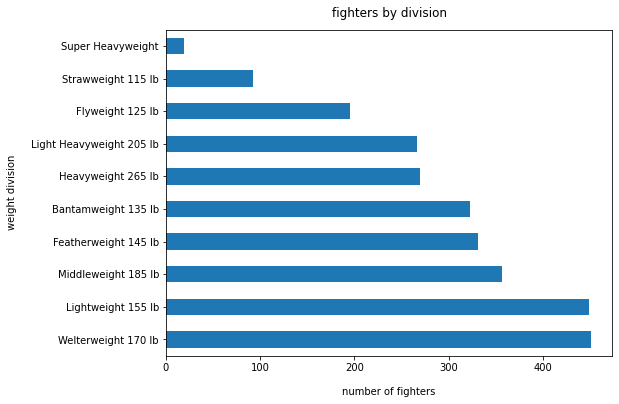

In [406]:
df['weight_class'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("number of fighters", labelpad=14)
plt.ylabel("weight division", labelpad=14)
plt.title("fighters by division", y=1.02);

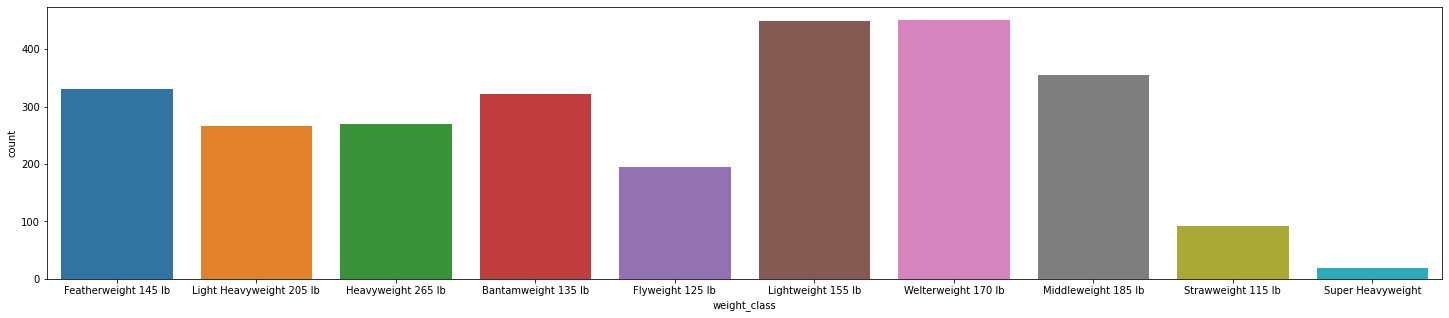

In [407]:
plt.figure(figsize=(25,5))
sns.countplot(x='weight_class', data=df)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


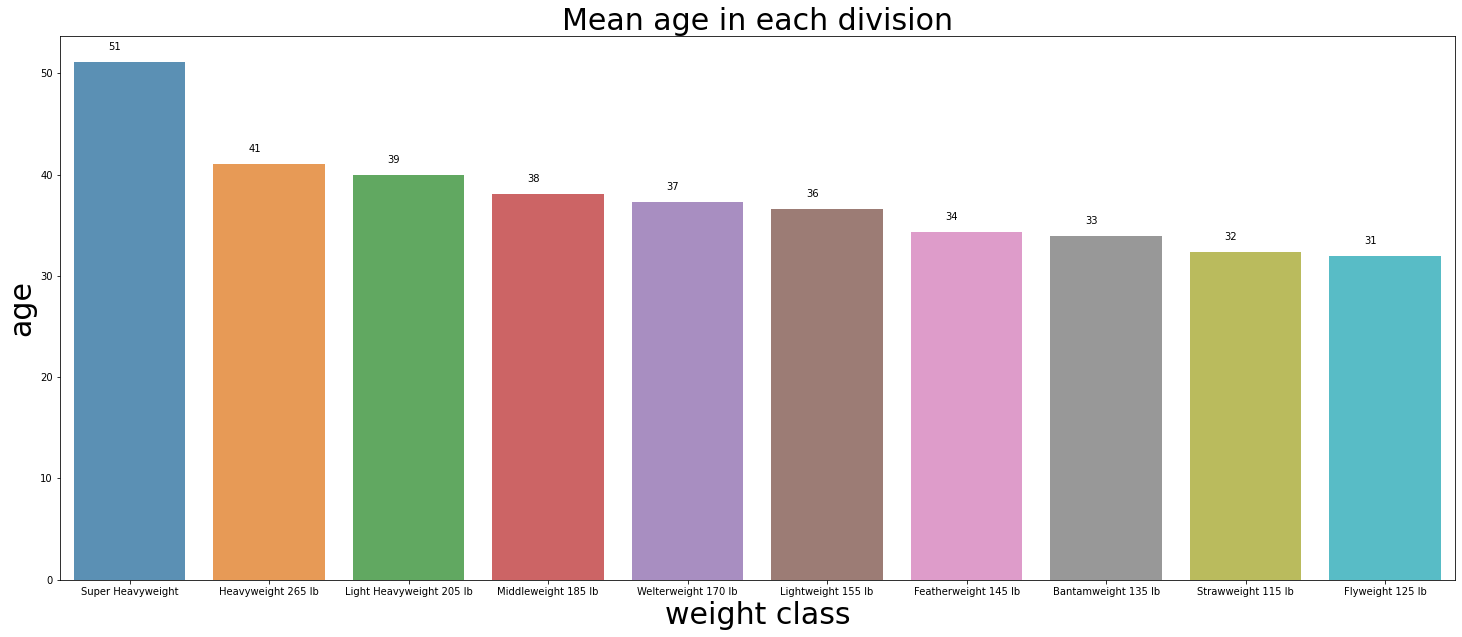

In [409]:
weight_age = df.groupby('weight_class')['Age'].mean().sort_values(ascending=False)
weight_age = weight_age[:12,]
plt.figure(figsize=(25,10))
plt_weight_age = sns.barplot(weight_age.index, weight_age, alpha=0.8)
plt.title('Mean age in each division', fontsize=30)
plt.ylabel('age', fontsize=30)
plt.xlabel('weight class', fontsize=30)
plt.xticks(fontsize= 10) 
for p in plt_weight_age.patches:
    plt_weight_age.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


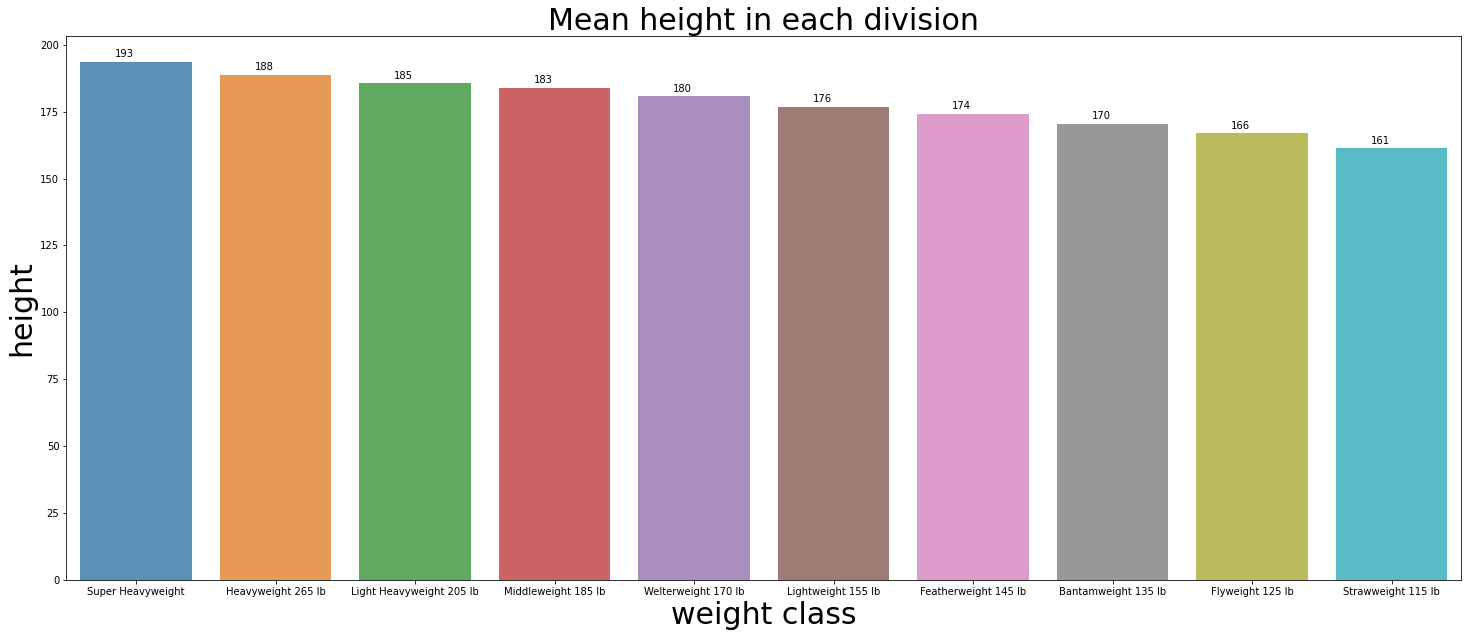

In [412]:
weight_height = df.groupby('weight_class')['height_cm'].mean().sort_values(ascending=False)
weight_height= weight_height[:12,]
plt.figure(figsize=(25,10))
plt_weight_height = sns.barplot(weight_height.index, weight_height, alpha=0.8)
plt.title('Mean height in each division', fontsize=30)
plt.ylabel('height (cm)', fontsize=30)
plt.xlabel('weight class', fontsize=30)
plt.xticks(fontsize= 10) 
for p in plt_weight_height.patches:
    plt_weight_height.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


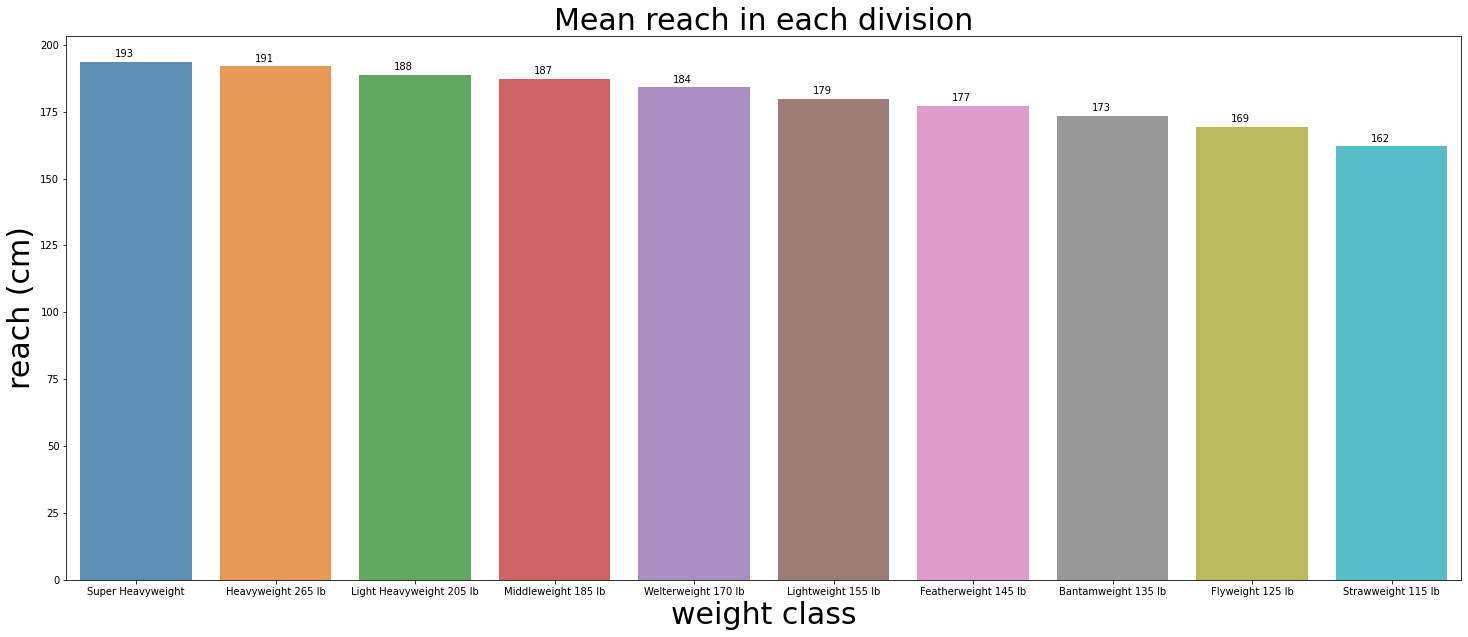

In [414]:
weight_reach = df.groupby('weight_class')['reach_cm'].mean().sort_values(ascending=False)
weight_reach = weight_reach[:12,]
plt.figure(figsize=(25,10))
plt_weight_reach  = sns.barplot(weight_reach.index, weight_reach, alpha=0.8)
plt.title('Mean reach in each division', fontsize=30)
plt.ylabel('reach (cm)', fontsize=30)
plt.xlabel('weight class', fontsize=30)
plt.xticks(fontsize= 10) 
for p in plt_weight_reach.patches:
    plt_weight_reach.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


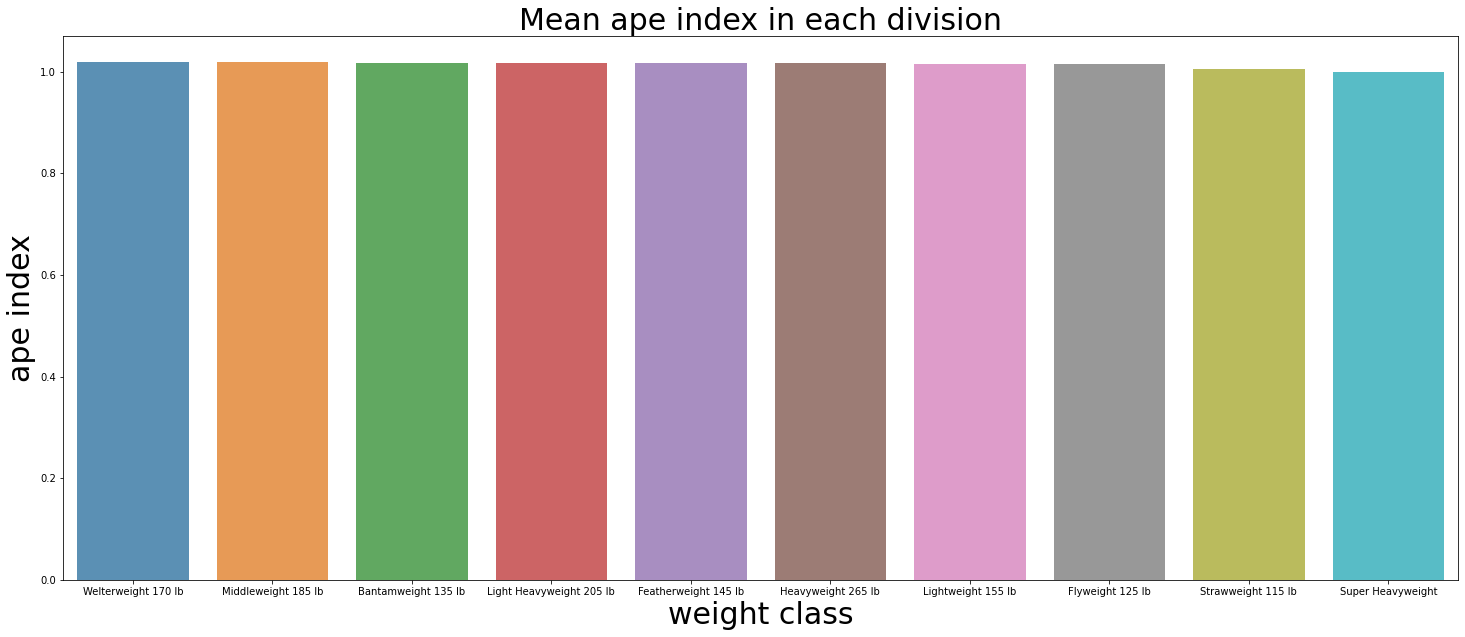

In [418]:
weight_ap = df.groupby('weight_class')['ape_index'].mean().sort_values(ascending=False)
weight_ap = weight_ap[:12,]
plt.figure(figsize=(25,10))
plt_weight_ap  = sns.barplot(weight_ap.index, weight_ap, alpha=0.8)
plt.title('Mean ape index in each division', fontsize=30)
plt.ylabel('ape index', fontsize=30)
plt.xlabel('weight class', fontsize=30)
plt.xticks(fontsize= 10) 
for p in plt_weight_ap.patches:
    plt_weight_ap.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [440]:
df.groupby(['weight_class'])['win_percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
weight_class,,,,,,,,
Bantamweight 135 lb,323.0,0.710415,0.126506,0.000000,0.640000,0.705882,0.800000,1.000000
Featherweight 145 lb,331.0,0.727276,0.120611,0.000000,0.666667,0.729730,0.812500,1.000000
Flyweight 125 lb,195.0,0.718630,0.125864,0.333333,0.636364,0.718750,0.800000,1.000000
Heavyweight 265 lb,269.0,0.657145,0.192463,0.000000,0.600000,0.681818,0.764706,1.000000
Light Heavyweight 205 lb,266.0,0.674991,0.159784,0.000000,0.615385,0.692308,0.771280,1.000000
Lightweight 155 lb,449.0,0.707714,0.120384,0.000000,0.642857,0.705882,0.785714,1.000000
Middleweight 185 lb,356.0,0.702727,0.132088,0.000000,0.642857,0.719375,0.777778,1.000000
Strawweight 115 lb,92.0,0.688574,0.142208,0.166667,0.597059,0.696154,0.778986,1.000000
Super Heavyweight,19.0,0.483965,0.180253,0.200000,0.333333,0.500000,0.660256,0.777778


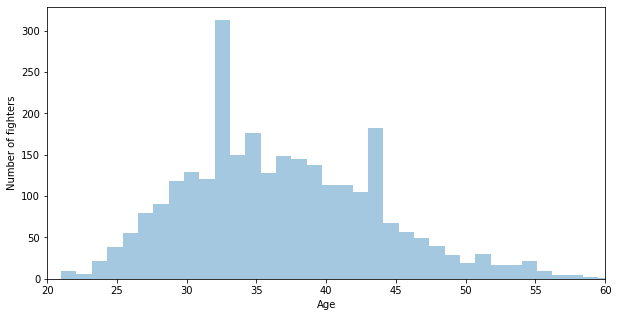

In [433]:
plt.figure(figsize=(10,5))
plt.xlim(20,60)
plt.xlabel('Age')
plt.ylabel('Number of fighters')
sns.distplot(df['Age'],bins=40,kde=False)
plt.show()

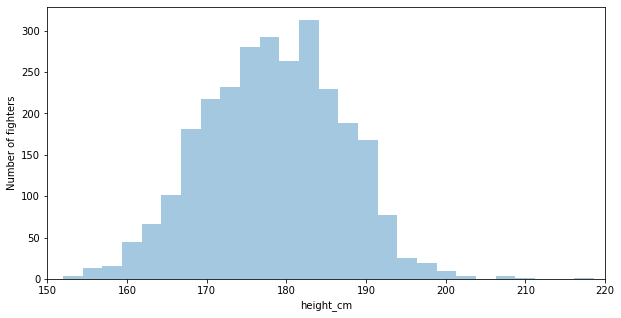

In [430]:
plt.figure(figsize=(10,5))
plt.xlim(150,220)
plt.xlabel('height')
plt.ylabel('Number of fighters')
sns.distplot(df['height_cm'],bins=30,kde=False)
plt.show()

### Next Steps
    - Scrape ufc events
    - Clean ufc events file
    - Look at how other sports machine works
    - Combine both files to create history
    - Create machine learning models
    - Clean oveall files/folders
    - Create presentation
    - Present